In [2]:
!pip install pandas matplotlib requests

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [6]:
def get_coordinates(city):
    geo_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city}"
    response = requests.get(geo_url)
    data = response.json()
    if "results" not in data:
        raise Exception("City not found")
    return data["results"][0]["latitude"], data["results"][0]["longitude"]

def fetch_weather_data(lat, lon, start_date, end_date):
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}"
        f"&hourly=temperature_2m&timezone=auto"
    )
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame({
        "time": data["hourly"]["time"],
        "temperature": data["hourly"]["temperature_2m"]
    })

In [8]:
city = "Mumbai"
start_date = (datetime.today() - timedelta(days=7)).strftime("%Y-%m-%d")
end_date = datetime.today().strftime("%Y-%m-%d")

lat, lon = get_coordinates(city)
df = fetch_weather_data(lat, lon, start_date, end_date)
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

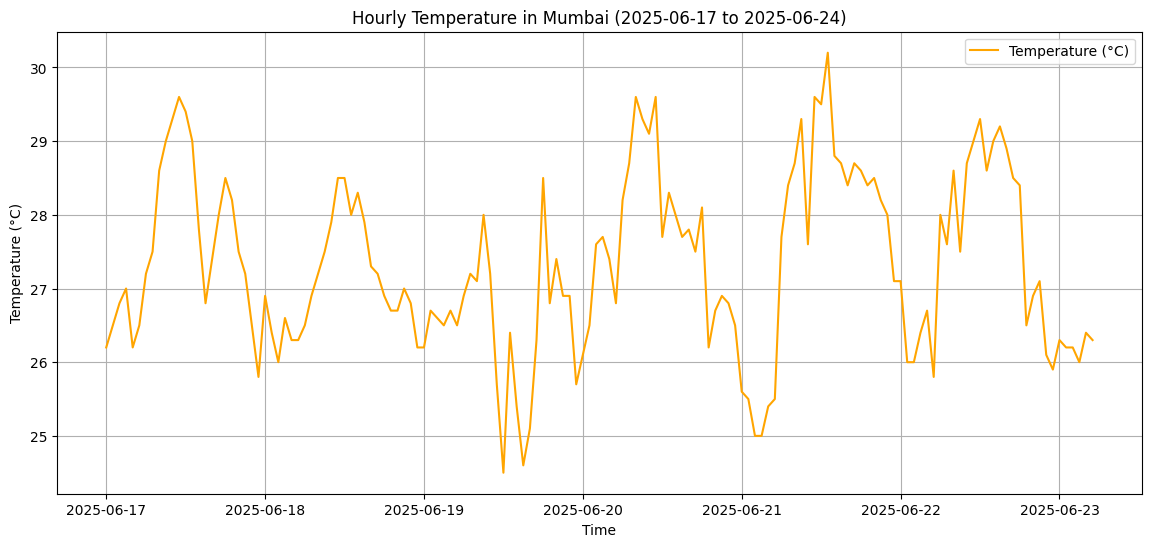

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature'], color='orange', label='Temperature (°C)')
plt.title(f"Hourly Temperature in {city} ({start_date} to {end_date})")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

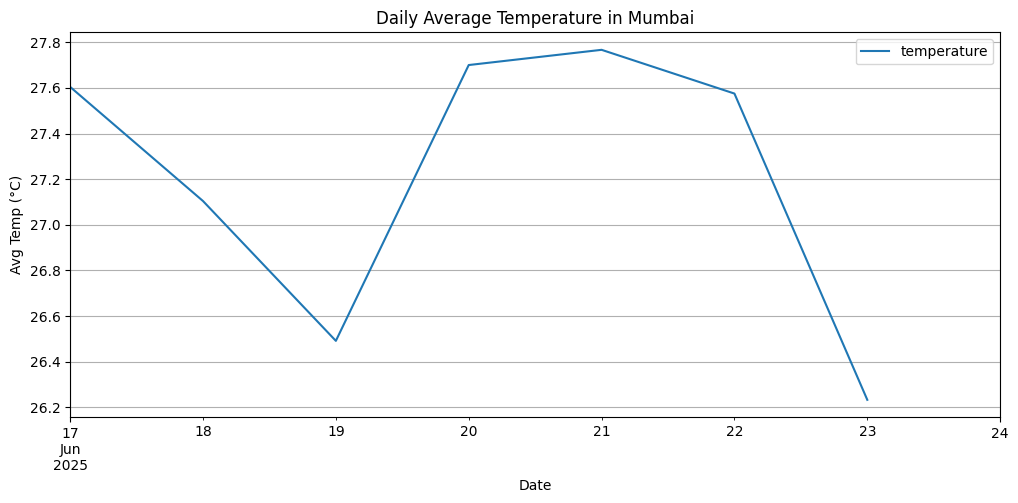

In [11]:
daily_avg = df.resample('D').mean()
daily_avg.plot(title=f"Daily Average Temperature in {city}", figsize=(12, 5))
plt.xlabel("Date")
plt.ylabel("Avg Temp (°C)")
plt.grid(True)
plt.show()

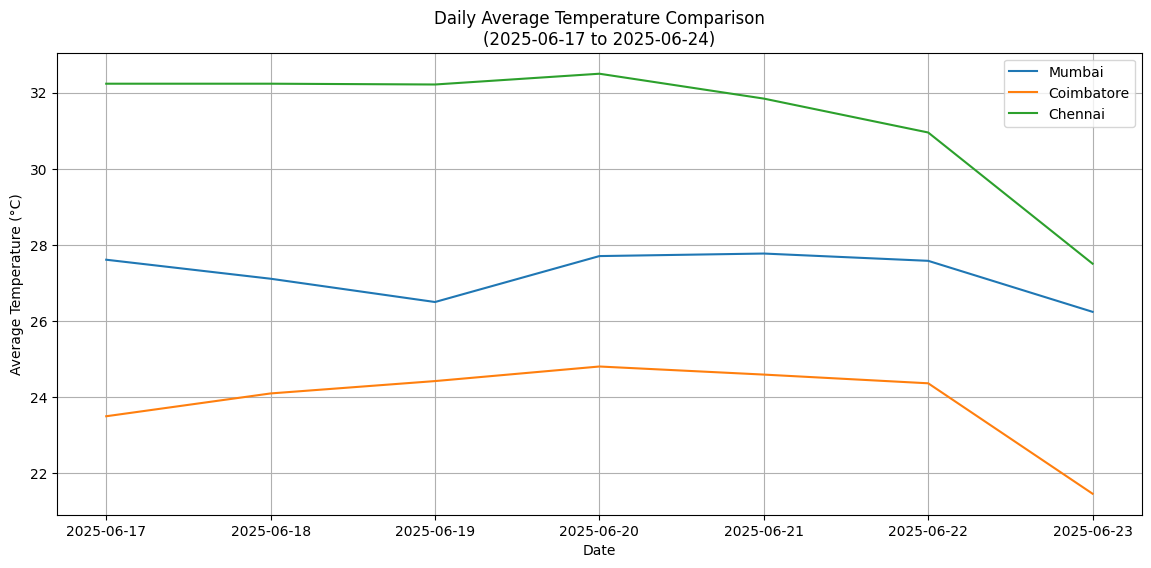

In [14]:

cities = ["Mumbai", "Coimbatore", "Chennai"]
start_date = (datetime.today() - timedelta(days=7)).strftime("%Y-%m-%d")
end_date = datetime.today().strftime("%Y-%m-%d")
city_data = {}

for city in cities:
    lat, lon = get_coordinates(city)
    df = fetch_weather_data(lat, lon, start_date, end_date)
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    daily_avg = df.resample('D').mean()
    city_data[city] = daily_avg

plt.figure(figsize=(14, 6))
for city in cities:
    plt.plot(city_data[city].index, city_data[city]['temperature'], label=city)

plt.title(f"Daily Average Temperature Comparison\n({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
